In [ ]:
pip install xlrd==1.2.0 ### ######

In [ ]:
pip install xlsxwriter

In [ ]:
name_file = "LSTM_dataset_2"

In [ ]:
from sklearn import metrics , cross_decomposition, model_selection
from sklearn.model_selection import cross_validate
from scipy.signal import savgol_filter
import pandas as pd
import numpy as np
import xlrd
import xlsxwriter
from sklearn.preprocessing import StandardScaler, MinMaxScaler #for calculate SNV
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler ## for calculate SNV
from sklearn.model_selection import train_test_split as split
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut 
from sys import stdout
import re
from keras.layers.advanced_activations import LeakyReLU
from sklearn.model_selection import train_test_split   
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from keras.layers import Input
from keras.utils import np_utils

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ write name of output file name 
time1=time.time()

# ================= import data
workbook = xlrd.open_workbook("/IG-Dataset18_11.xlsx","rb")
sheets = workbook.sheet_names()
sheet_num=1  ## add sheet number # 5
sh = workbook.sheet_by_name(sheets[(sheet_num)-1])
n_cols=0 ##number of colum you have to delet from the front
n_rows=0 ##number of rows you have to delet from the front 
m_cols=0 ## number of colum you have to delet from the end
m_rows=0 ## number of rows you have to delet from the end
M_rows=sh.nrows-m_rows
M_cols=sh.ncols-m_cols
required_data = []
for rownum in range(n_rows,M_rows):
    row_valaues = sh.row_values(rownum)
    required_data.append(row_valaues[n_cols:M_cols])
Required_data=np.asarray(required_data)
X=Required_data[1:257674,0:16].astype(float)  #  25194 # 82334  ( 4:41 & 1:40)
X= np.array (X)

Y=Required_data[1:257674,17:18].astype(float).ravel()    # (42:43  & 41:42)
print(X.shape)

bands = Required_data[0:1, 0:16]      # ( 4:41 & 1:40)
bands= np.array (bands)
#===============
X_train, X_test, y_train, y_test = split(X, Y, test_size=(0.20), random_state=0)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
# ==============================================

nb_classes = len (np.unique( y_train ))
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train = X_train.reshape(X_train.shape[0], 16, 1)   #Reshape for lstm - should work!!
X_test= X_test.reshape(X_test.shape[0], 16, 1)

print('class', nb_classes)

(257673, 16)
class 2


In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
from keras.utils import np_utils
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, Flatten, MaxPooling2D,BatchNormalization
from keras.layers import LSTM,TimeDistributed,Conv1D,MaxPooling1D
from keras.layers import Dense, Dropout, Flatten
from keras import models
from keras import layers
from keras.models import Model

model_lstm = Sequential() #=============================== climate-based model
model_lstm.add(LSTM(units = 512, return_sequences = True, input_shape = (16,1), activation='tanh'))
model_lstm.add(LSTM(units = 256, return_sequences = True))
model_lstm.add(Dense(128, activation='relu'))
model_lstm.add(Dense(64, activation='relu'))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(32, activation='relu'))
model_lstm.add(Dropout(0.2))
model_lstm.add(Flatten())
model_lstm.add(Dense(nb_classes, activation='softmax'))

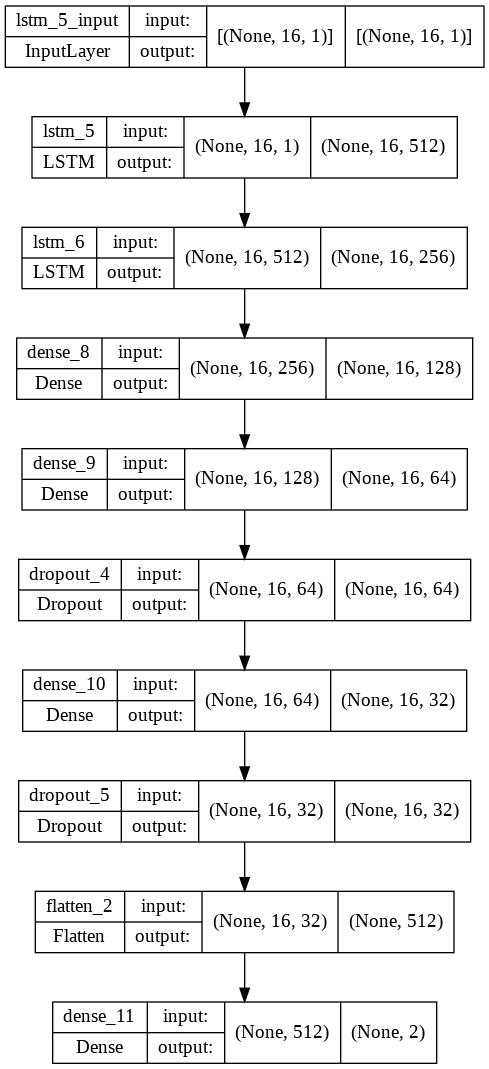

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model_lstm, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import CSVLogger

model_lstm.compile(loss=keras.losses.binary_crossentropy,optimizer='RMSprop',metrics=['accuracy'])  

csv_logger = CSVLogger('training.log', separator=',', append=False)
mc = ModelCheckpoint(name_file +'.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
cnn11 = model_lstm.fit(X_train,Y_train, batch_size=300, epochs=500, validation_data=(X_test ,Y_test), callbacks=[mc,csv_logger])
print (("Training time=", time.time()-time1))
np.save("LSTM_data_2_@history", cnn11.history)

Epoch 1/500
686/688 [============================>.] - ETA: 0s - loss: 0.4196 - accuracy: 0.7982
Epoch 1: val_loss improved from inf to 0.32216, saving model to LSTM_dataset_2.h5
688/688 [==============================] - 22s 21ms/step - loss: 0.4196 - accuracy: 0.7982 - val_loss: 0.3222 - val_accuracy: 0.8600
Epoch 2/500
685/688 [============================>.] - ETA: 0s - loss: 0.2997 - accuracy: 0.8596
Epoch 2: val_loss did not improve from 0.32216
688/688 [==============================] - 13s 18ms/step - loss: 0.2996 - accuracy: 0.8597 - val_loss: 0.3318 - val_accuracy: 0.8567
Epoch 3/500
685/688 [============================>.] - ETA: 0s - loss: 0.2537 - accuracy: 0.8786
Epoch 3: val_loss improved from 0.32216 to 0.28515, saving model to LSTM_dataset_2.h5
688/688 [==============================] - 13s 19ms/step - loss: 0.2537 - accuracy: 0.8787 - val_loss: 0.2851 - val_accuracy: 0.8633
Epoch 4/500
685/688 [============================>.] - ETA: 0s - loss: 0.2301 - accuracy: 0.888

In [ ]:
###################### 2
from contextlib import redirect_stdout
with open('./'+name_file+".xls", 'w') as f:
    with redirect_stdout(f):
        model_lstm.summary()

In [ ]:
import pandas as pd
log_data = pd.read_csv('./training.log', sep=',', engine='python')
#print (log_data)
LSTM =log_data

In [ ]:
print (name_file)

LSTM_dataset_2


In [ ]:
import numpy as np
LSTM11_history_11=np.load('./LSTM_data_2_@history.npy',allow_pickle='TRUE').item()

In [ ]:
from keras.models import load_model
####################### 1
name_file11 = './LSTM_dataset_2.h5' 
fashion_model = load_model(name_file11) # load model
fashion_model.summary() # summarize model.

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 16, 512)           1052672   
                                                                 
 lstm_6 (LSTM)               (None, 16, 256)           787456    
                                                                 
 dense_8 (Dense)             (None, 16, 128)           32896     
                                                                 
 dense_9 (Dense)             (None, 16, 64)            8256      
                                                                 
 dropout_4 (Dropout)         (None, 16, 64)            0         
                                                                 
 dense_10 (Dense)            (None, 16, 32)            2080      
                                                                 
 dropout_5 (Dropout)         (None, 16, 32)           

In [ ]:
val_loss, val_accuracy=fashion_model.evaluate(X_test ,Y_test) ## to get test accuracy and losses
print(val_loss, val_accuracy)

1611/1611 [==============================] - 8s 4ms/step - loss: 0.1287 - accuracy: 0.9381
0.12873387336730957 0.9381003379821777


In [ ]:

time2=time.time()
predict_prob=fashion_model.predict(X_test)
y_pred=np.argmax(predict_prob,axis=1)
print ('classification time:', time.time()-time2)

##print (y_pred)
y_true=np.argmax(Y_test, axis=1)
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
CM = confusion_matrix(y_true, y_pred)
print (CM)
print(classification_report(y_true, y_pred))

precision = precision_score(y_test, y_pred, average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall: %f' % recall)
# f1: tp / (tp + fp + fn)
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 score: %f' % f1)
#-----------  IoU
from sklearn.metrics import jaccard_score
print ('IoU:', jaccard_score(y_true, y_pred, average='micro'))


test_eval = fashion_model.evaluate(X_test, Y_test)

loss, accuracy = fashion_model.evaluate(X_train, Y_train)
print('loss_train: ', loss, 'accuracy_train: ', accuracy)
print('Test loss:', test_eval[0], 'Test accuracy:', test_eval[1])

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
#================ classification metrics
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print ('TPR',TPR)   
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print('TNR',TNR)
# Precision or positive predictive value
PPV = TP/(TP+FN)
print ('PPV', PPV)
# Negative predictive value
NPV = TN/(TN+FN)
print('NPV', NPV)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print('FPR',FPR)
# False negative rate
FNR = FN/(TP+FN)
print ('FNR',FNR)  
# False discovery rate
FDR = FP/(TP+FP)
print ('FDR',FDR)    
# Overall accuracy   
ACC = (TP+TN)/(TP+FP+FN+TN)
print ('ACC',ACC)

classification time: 6.171212673187256
[[17449  1187]
 [ 2003 30896]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     18636
           1       0.96      0.94      0.95     32899

    accuracy                           0.94     51535
   macro avg       0.93      0.94      0.93     51535
weighted avg       0.94      0.94      0.94     51535

Precision: 0.939145
Recall: 0.938100
F1 score: 0.938375
IoU: 0.8834170854271357
6442/6442 [==============================] - 27s 4ms/step - loss: 0.1269 - accuracy: 0.9378
loss_train:  0.12693153321743011 accuracy_train:  0.9378135204315186
Test loss: 0.12873387336730957 Test accuracy: 0.9381003379821777
TPR 0.9391166904769142
TNR 0.9363060742648637
PPV 0.9391166904769142
NPV 0.8970285831791075
FPR 0.0636939257351363
FNR 0.06088330952308581
FDR 0.0369977869899947
ACC 0.9381003201707577


In [ ]:
history_dict = LSTM11_history_11 

Confusion matrix, without normalization


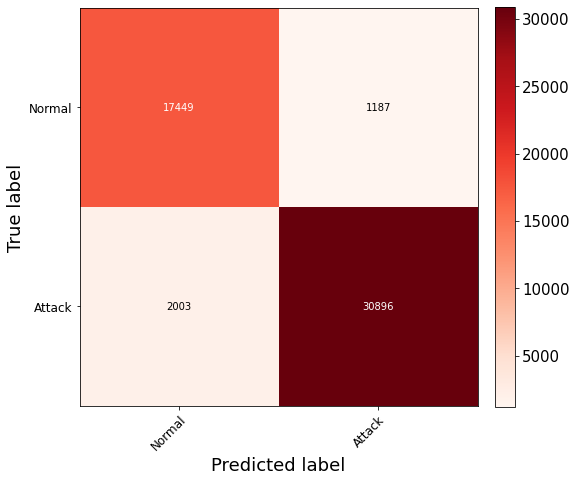

Normalized confusion matrix


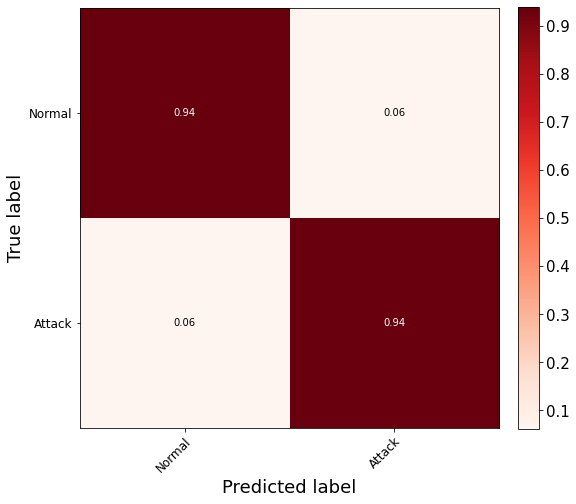

In [ ]:
class_names = ['Normal','Attack']


def plot_confusion_matrix(y_true, y_pred, classes,normalize=False,title=None, cmap=plt.cm.Reds):
                                              
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = None    ### 'Normalized confusion matrix'
        else:
            title = None        ### 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots(figsize=(8,8))
    ax.tick_params(labelsize=12)       #7777777777777777777777777777777777777777777777777777
    cmap=plt.cm.Reds                      #  cmap=plt.cm.Blues
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    cbar = ax.figure.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    for t in cbar.ax.get_yticklabels():
        t.set_fontsize(15)
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
             
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

font = {'family' : 'Times New Roman',
        'color'  : 'black',
        'weight' : 'bold',
        'size'   : 15}

np.set_printoptions(precision=2) ########################## 2

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,title= None)             
plt.xlabel('Predicted label', fontsize=18)
plt.ylabel('True label', fontsize=18)
plt.savefig('confusion matrix_1_'+name_file+'.png')
plt.show()

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,title=None)            
plt.xlabel('Predicted label', fontsize=18)
plt.ylabel('True label', fontsize=18)
plt.savefig('confusion matrix_2_'+name_file+'.png')
plt.show()

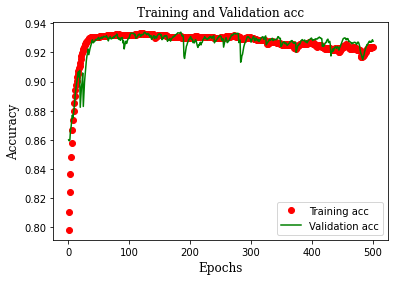

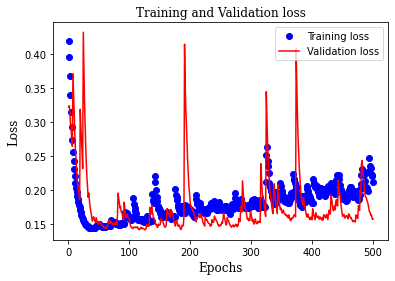

In [ ]:
#history_dict=cnn11.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
acc_values=history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']
epochs=range(1, len(acc_values)+1)
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
loss_values=smooth_curve(loss_values)
val_loss_values=smooth_curve(val_loss_values)
acc_values=smooth_curve(acc_values)
val_acc_values=smooth_curve(val_acc_values)

font = {'family' : 'serif',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 12}
        

plt.plot(epochs, acc_values, 'ro', label='Training acc')
plt.plot(epochs, val_acc_values, 'g', label='Validation acc')
plt.title('Training and Validation acc', fontdict=font)
plt.xlabel('Epochs', fontdict=font)
plt.ylabel('Accuracy', fontdict=font)
plt.legend()
plt.savefig("accuracy"+name_file+".png")
plt.show()

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and Validation loss', fontdict=font)
plt.xlabel('Epochs',fontdict=font)
plt.ylabel('Loss',fontdict=font)
plt.legend()
plt.savefig("loss"+name_file+".png")
plt.show()


In [ ]:
from IPython.display import FileLink
FileLink(r'./LSTM_dataset_2.h5') #=======================

/content/LSTM_dataset_2.h5